<a href="https://colab.research.google.com/github/muthamlikitha/Data-Science-Projects/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
df = df[features + [target]]
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [23]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [24]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [25]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


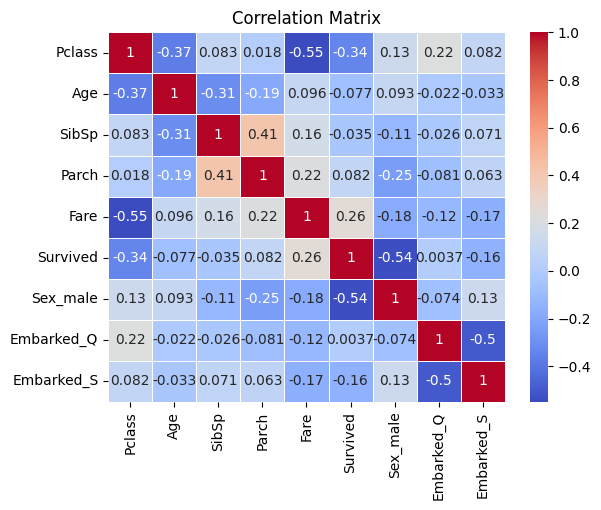

In [26]:
# Convert categorical features to numerical using one-hot encoding
import matplotlib.pyplot as plt
import seaborn as sns
df_processed = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Now calculate and display the correlation matrix for the processed dataframe
correlation_matrix = df_processed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [27]:
# 1. Handle missing values
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())  # Fill missing 'Age' with median
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Fill missing 'Embarked' with mode
# 2. Encode categorical columns using LabelEncoder
labelencoder = LabelEncoder()
# 'Sex' column: Male -> 1, Female -> 0
df.loc[:, 'Sex'] = labelencoder.fit_transform(df['Sex'])
# 'Embarked' column: C -> 0, Q -> 1, S -> 2
df.loc[:, 'Embarked'] = labelencoder.fit_transform(df['Embarked'])

In [28]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
logistic_regression = LogisticRegression(max_iter=200) # Increase max_iter for convergence
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [31]:
y_pred = logistic_regression.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [32]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [33]:
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8100558659217877


In [34]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [35]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[90 15]
 [19 55]]


Not Survived (0): 549
Survived (1): 342


/tmp/ipython-input-3919107577.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='pastel')


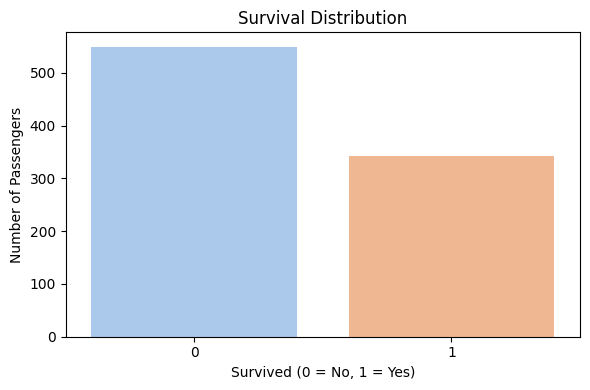

In [36]:
survival_counts = df['Survived'].value_counts()

# Print the counts
print("Not Survived (0):", survival_counts[0])
print("Survived (1):", survival_counts[1])

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='pastel')
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

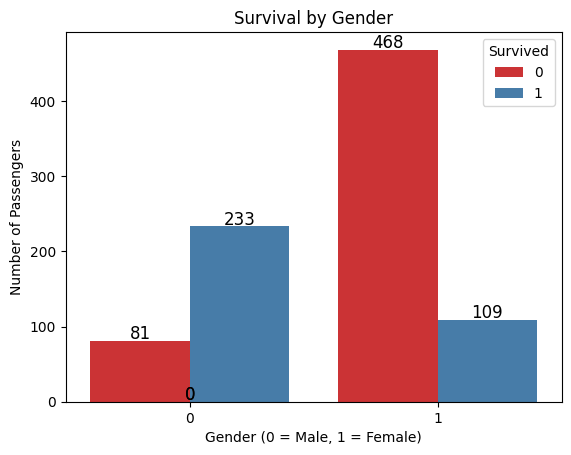

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival by Gender
ax = sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')

# Adding titles and labels
plt.title('Survival by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Number of Passengers')

# Add text annotations on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.show()

In [38]:
import pandas as pd

# Example passenger data
passenger = {
    'Pclass': [1],
    'Sex': [0],         # 0 = male, 1 = female (assumed encoding)
    'Age': [30],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [100],
    'Embarked': [2]     # assumed encoding (e.g., 0 = C, 1 = Q, 2 = S)
}

# Convert to DataFrame
passenger_df = pd.DataFrame(passenger)

# Make sure the columns match training data order
passenger_df = passenger_df[X_train.columns]

# Predict survival using the trained logistic regression model
prediction = logistic_regression.predict(passenger_df)[0]

# Print result
print("Predicted Survival:", "Yes" if prediction == 1 else "No")


Predicted Survival: Yes
